# Palifico Part 1
The goal of this part is to create the rules and game mechanics for the game of palifico so that `NUM_PLAYERS` can play the game by manually inputting their guesses. The Part is divided into 10 problems each of which will be used in subsequent problems to slowly build up the whole game.

## Rules
You know them, but here's a recap:
* Every player starts with 5 dice
* In every round, all players roll all of their dice and peak to see the number value on each dice
* A round then starts with the first player guessing a number of dice as well as a number value (dice face)
  so that at least more than the given number of dice exist in the whole game (the dice of all players) for that given face
    E.g 5 fives or 3 twos (5 dices corresponding to the face with number 5, ...)
  Starting with the value of a tucan is not allowed unless he playes a palifico (see below)
* The round continious by the next player either calling bullshit or continuing the guessing game. 
  This can be done by either increasing the number value (dice face) or by increasing the number of dice, or both
    E.g after 5 fives the next player must at least say either 5 sixes or 6 fives
* Instead of a number value a tucan (dice value 1) can be used. This will correspond to ceil(value/2) of the given number of dice so
    E.g after 5 fives, 3 tucans can be guessed. After 6 fours, 3 tucans can be guessed, ...
* If a previous player gave a guess in form of this tucan, the player can switch back to normal face values by 2*value+1 so
    E.g after 3 tucans, 7 of any given number can be guessed. After 1 tucan, 3 of any number

* If a player calls bullshit, all the dice of the given number value are counted (including tucans except a palifico is palyed).
  If the number matches or exceeds the guessed number the player calling bullshit looses a dice, otherwise the previous player that guessed wrong looses one.
* The next round is played by player that lost a dice
* If a player ends up with one dice left, a palifico is played. All players have to roll the dice while loudly shouting "PALIFICOO". The round starts normally with the player making a guess, this time he can start with a number value of a tucan (1) and the tucans don't count towards the total number of dice for any given value (except of course for the tucans themselves)
* All subsequent players have to continue guessing with the same number values, so it is fixed

In [1]:
# constants
# Use them rather than the raw numbers to better change it later
NUM_PLAYERS = 4
MAX_DICES = 5

In [163]:
# Problem 1
# We want to simulate a dice roll of all players using a random generator (see `np.random.randint`)
# and then count the number of dice for each face that were rolled
#
# We start with a list `remaining_dices` that counts the number of dice each player has left (first element first player,...)
# E.g for an array remaining_dices = [1,2,5,5] (which means player 1 has 1 dice left, player 2 2, ...) 
# a total of 13 random numbers should be generated and put into bins of number 1 to 6.
#
# Write a function `get_random_bins` that takes a number as an input argument
# and outputs a list `b` with the length of 6 where the first number b[0] corresponds to the face 1, ..., b[5] to face 6

# to use np.random.randint lets first import numpy (if that doesnt work, you should do `pip install numpy` in your python env)
import numpy as np
remaining_dices = [1, 2, 5, 5]

def get_random_bins(total_dices):
    # roll
    roll = np.random.randint(1, 6+1, size=total_dices)

    # count occurences
    bins = np.bincount(roll, minlength=6+1)
    return bins[1:]

# call the function here by using the remaining_dices array
get_random_bins(sum(remaining_dices))

array([2, 2, 2, 3, 3, 1])

In [3]:
# Problem 2
# Write a function `get_input` that asks the player for a string of the form e.g. `1, 5` which  corresponds to 1 dice of face value 5
# and then extracts both numbers and returns them as a tuple, i.e. `return (1, 5)`
# If a player types in something else let him try again until he gets it right
#
# Hint: the python function `input`, `split` will be helpful as well as `try / except ValueError` to catch errors by the user
#       Google the try/except thing if it is unclear
#
# When you finished your function create a loop that gets the input using `get_input` for all players in the game and prints
# them out using `print`
def get_input():
    out = ()
    
    while not out:
        inp = input("Make your guess\n")
        inp = inp.split(',')
        try: 
            out = (int(inp[0]), int(inp[1]))
        except ValueError:
            print("Error invalid guess. Has to have the form `num,face` where both are integers ")
    return out


for i in range(len(remaining_dices)):
    print(get_input())

Make your guess
1, 2
(1, 2)
Make your guess
2, 3
(2, 3)
Make your guess
3, 3
(3, 3)
Make your guess
3,4
(3, 4)


In [143]:
# Problem 3
# Extend problem 2 so that the input is checked whether it is correct or not
# Write a function `check_input` that takes the new input as well as the previous input
# (which is empty for the first player in the round). The function should return True or False depending on the following checks
# 1. the face is checked to lie in the range [1,6]
# 2. If a previous input exists either the face value or the number of dice must increase
# 3. If no previous input exists the face must not be 1
# Ignore all the tucan rules for now

def check_input(inp, previous_inp):
    num, face = inp
    
    # check face
    if face < 1 or face > 6:
        return False
    
    # ok if previou_inp is empty
   if not previous_inp:
        return face != 1

    # check for increase    
    individual_increase = tuple(map(lambda x,y: x>y, inp, previous_inp))
    # it is ok if one of both increased (element wise or is any() in python)
    return any(individual_increase)
    
    
# print(get_input())
prev = ()
for i in range(len(remaining_dices)):
    inp = get_input()
    while not check_input(inp, prev):
        print("Wrong, go higher!")
        inp = get_input()
        
    prev = inp
    print(inp)

Make your guess
1,2
(1, 2)
Make your guess
1,4
(1, 4)
Make your guess
1,5
(1, 5)
Make your guess
1,6
(1, 6)


In [4]:
# Problem 4
# Extend problem 2 and 3 so that instead of a 1 the string 'tucan' or 'pelican' can be entered for a face value
# and also 'bullshit' as a single string (without commas and such) is accepted 
# 1. the get_input function should be extended to also a player index as an argument and print it in the input console
# 2. the check_input function should be return True for these new additions namely
#    * the input 'bullshit' returns true if a previous input exists
#    * the tucan rule has to apply correctly (levae out the special case palifico (1 dice left) for now)
#    Hint: take the formulas ceil(value/2) as well as value*2+1 as reference :)
#
# Note: give those functions a new name and again write a loop over all players that gets the input and checks it for all

def get_tucan_input(idx):
    out = ()
    
    while not out:
        inp = input("Player {} make your guess\n".format(idx))
        
        if inp.strip() == 'bullshit':
            return 'bullshit'
        
        inp = inp.split(',')
        try: 
            num = int(inp[0])
            face = inp[1].strip()
            if face == 'tucan' or face == 'pelican':
                out = (num, 1)
            else:
                out = (num, int(face))
        except ValueError:
            print("Error invalid guess. Has to have the form `num,face` where both are integers ")
    return out

def check_tucan_input(inp, previous_inp):
    
    # check bullshit, only valid if previous inp exists
    if inp == 'bullshit' and previous_inp:
        return True
    
    num, face = inp
    
    # check face
    if face < 1 or face > 6:
        return False
    
    # ok if previou_inp is empty
    # and no tucan since starting this is not allowed
    if not previous_inp:
        return face != 1

    # check for tucan rule
    p_num, p_face = previous_inp
    if face == 1 and p_face != 1 :
        inc = 2*num >= p_num
    elif face != 1 and p_face == 1:
        inc = num > 2*p_num
    else:
        inc = num > p_num or face > p_face

    # it is ok if one of both increased (element wise or is any() in python)
    return inc
    

prev = ()
for i in range(len(remaining_dices)):
    inp = get_tucan_input(i)
    while not check_tucan_input(inp, prev):
        print("Wrong, go higher!")
        inp = get_input()
        
    prev = inp
    print(inp)

Player 0 make your guess
1,2
(1, 2)
Player 1 make your guess
2,2
(2, 2)
Player 2 make your guess
3,4
(3, 4)
Player 3 make your guess
4,3
(4, 3)


In [5]:
# Problem 5
# Implement a function `validate_guess` that takes the following arguments
# a guess (a tuple (num, face))
# a list of bins from problem 1
# a boolean that indicates if a palifico is played or not
# if the guess was correct, it returns True or False if the guess was wrong
# Note: don't forget to count the tucans

def validate_guess(inp, bins):
    num, face = inp
    occurences = bins[face-1]
    if(face != 1):
        occurences = occurences + bins[0]
    return occurences >= num

b = get_random_bins(sum(remaining_dices))
print(inp)
print(b)
validate_guess(inp, b)

(4, 3)
[2 1 2 4 2 2]


True

In [23]:
# Problem 6
# Write a function that takes the following arguments
# 1. a list of remaining dice like in problem 1 
# 2. a boolean that is the result of the `validate_guess` from problem 5 
# 3. an index of the current player that sais bullshit
# Calculate the new remaining dice list using the function written in Problem 5 and return it
#
# Hint: if you take the list as input to the function you have to copy it if you want to modify it and return it
#       python normally uses an argument by reference, so if you change the value in a function it is also changed outside
#       of the function. If you don't get what I'm saying read up on "pass by reference" and "pass by value"

def new_remaining_dice(prev, validated_guess, idx):
    remaining = prev[:]
    # if validated_guess is True, then player calling bullshit looses dice, otherwise the previous player
    loosing_idx = (idx - 1*(not validated_guess)) % len(prev)
    remaining[loosing_idx] = prev[loosing_idx] - 1
    return (remaining, loosing_idx)

print(remaining_dices)
new_remaining_dice(remaining_dices, False, 0)

[1, 2, 5, 5]


([1, 2, 5, 4], 3)

In [164]:
# Problem 7
# Combine all problems above to a full first round of palifico
# Wrap this in a function caled `one_round` that takes 
# 1. the the list of remaining dice for all player (see problem 1)
#    which of course in the start only contains MAX_DICES for each player
# and then call this function once

# Start score
score = NUM_PLAYERS * [MAX_DICES]

# Roll dice
def one_round(score):
    b = get_random_bins(sum(score))

    # Loop through game and inputs
    prev = ()
    idx = 0
    while True:
        inp = get_tucan_input(idx)
        while not check_tucan_input(inp, prev):
            print("Wrong, go higher!")
            inp = get_input()

        if inp == 'bullshit':
            break

        prev = inp
        idx = (idx+1) % NUM_PLAYERS
        print(inp)

    validated = validate_guess(prev, b, False)
    score, loosing_idx = new_remaining_dice(score, validated, idx)
    
    return score

one_round(score)

Player 0 make your guess
1,2
(1, 2)
Player 1 make your guess
2,4
(2, 4)
Player 2 make your guess
3,4
(3, 4)
Player 3 make your guess
bullshit


[5, 5, 5, 4]

In [16]:
# Problem 8
# Use problem 7 in a loop so that rounds are played until the first palifico (player with 1 dice left) is reached
score = NUM_PLAYERS * [MAX_DICES]
while min(score) > 1:
    score = one_round(score)
    print(score)

Player 0 make your guess
1,2
(1, 2)
Player 1 make your guess
bullshit
[5, 4, 5, 5]
Player 0 make your guess
1,2
(1, 2)
Player 1 make your guess
bullshit
[5, 3, 5, 5]
Player 0 make your guess
1,2
(1, 2)
Player 1 make your guess
bullshit
[5, 2, 5, 5]
Player 0 make your guess
4,4
(4, 4)
Player 1 make your guess
bullshit
[5, 1, 5, 5]


In [165]:
# Problem 9
# Rewrite Problem 4 so that the proper input is checked in case of a palifico. 
# A third argument of the function gives the boolean that decides if the current round is a palifico round
# The following checks are added
# * If a palifico is played the faces must match always
# * A starting value of 1 is allowed
#
# Also rewrite problem 5 so that the validation is performed correctly, also given a boolean indicating a round of palifico

def check_tucan_palifico_input(inp, previous_inp, palifico):
    
    # check bullshit, only valid if previous inp exists
    if inp == 'bullshit' and previous_inp:
        return True
    
    num, face = inp
    
    # check face
    if face < 1 or face > 6:
        return False
    
    # ok if previou_inp is empty
    # and no tucan since starting this is not allowed
    if not previous_inp:
        return face != 1
    
    p_num, p_face = previous_inp
    
    # check palifico, tucan rule does not apply so return
    if palifico:
        return face == p_face

    # check for tucan rule
    if face == 1 and p_face != 1 :
        inc = 2*num >= p_num
    elif face != 1 and p_face == 1:
        inc = num > 2*p_num
    else:
        inc = num > p_num or face > p_face

    # it is ok if one of both increased (element wise or is any() in python)
    return inc


def validate_guess(inp, bins, palifico=False):
    num, face = inp
    occurences = bins[face-1]
    if(not palifico and face != 1):
        occurences = occurences + bins[0]
    return occurences >= num

In [26]:
# Problem 10
# Rewrite Problem 8 so that problem 9 is used instead of problem 4 and 5
# You will need to somehow remember which player already played a palifico, since every player only plays one
# -> The rule of regaining a dice is not implemented for now so you don't have to worry about this
#
# This time play until a player looses all dice
# And very importantly LOUDLY print that a palifico is happening if a player reaches 1 dice

# Start score
score = NUM_PLAYERS * [MAX_DICES]

played_palificos = NUM_PLAYERS * [False]

# Roll dice
def one_round(score, start_idx):
    
    # Decide on palifico
    # TODO: each player only plays one palifico per one remaining dice
    palifico = (min(score) == 1) and not played_palificos[start_idx]
    if palifico:
        print("PAPAPAAAAALIIIIFIIIICOOOOOOO")
    
    b = get_random_bins(sum(score))

    # Loop through game and inputs
    prev = ()
    idx = start_idx
    while True:
        inp = get_tucan_input(idx)
        while not check_tucan_palifico_input(inp, prev, palifico):
            print("Wrong, go higher!")
            inp = get_input()

        if inp == 'bullshit':
            break

        prev = inp
        idx = (idx+1) % NUM_PLAYERS
        print(inp)

    validated = validate_guess(prev, b, palifico)
    score, idx = new_remaining_dice(score, validated, idx)
    
    return (score, idx)


score = NUM_PLAYERS * [MAX_DICES]
idx = 0
while min(score) > 0:
    score, idx = one_round(score, idx)
    print(score)

Player 0 make your guess
1,2
(1, 2)
Player 1 make your guess
bullshit
[5, 4, 5, 5]
Player 1 make your guess
1,2
(1, 2)
Player 2 make your guess
bullshit
[5, 4, 4, 5]
Player 2 make your guess
1,2
(1, 2)
Player 3 make your guess
1,4
(1, 4)
Player 0 make your guess
bulslhit
Error invalid guess. Has to have the form `num,face` where both are integers 
Player 0 make your guess
bullshit
[4, 4, 4, 5]
Player 0 make your guess
1,2
(1, 2)
Player 1 make your guess
bullshit
[4, 3, 4, 5]
Player 1 make your guess
1,3
(1, 3)
Player 2 make your guess
bullshit
[4, 3, 3, 5]
Player 2 make your guess
1,2
(1, 2)
Player 3 make your guess
1,3
(1, 3)
Player 0 make your guess
1,5
(1, 5)
Player 1 make your guess
bullshit
[4, 2, 3, 5]
Player 1 make your guess
10,1
Wrong, go higher!
Make your guess
10,2
(10, 2)
Player 2 make your guess
bullshit
[4, 1, 3, 5]
PAPAPAAAAALIIIIFIIIICOOOOOOO
Player 2 make your guess
1,1
Wrong, go higher!
Make your guess
1,2
(1, 2)
Player 3 make your guess
1,3
Wrong, go higher!
Make you

3.0


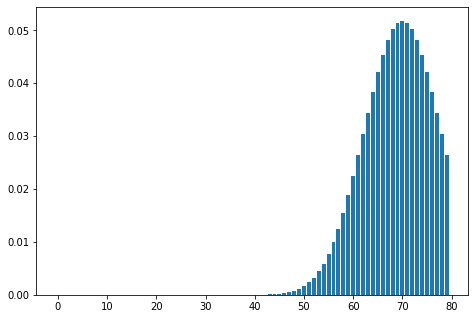

In [100]:
%matplotlib inline
# 
# P(p, n) = 1/6^n * sum_(k=0)^(floor((p-n)/6)) (-1)^k (n choose k) (p-6k-1 choose n-1)


from scipy.special import comb
print(comb(3,2))
def prob(p,n):
    limit = max(0, (p-n)//6)
    sum = 0
    for k in range(0, limit+1):
        sum = sum + pow(-1,k) * comb(n, k) * comb(p-6*k-1, n-1)
    return sum / pow(6, n)
    
    
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plist = list(range(80))
students = [prob(p,20) for p in plist]
ax.bar(plist,students)
plt.show()

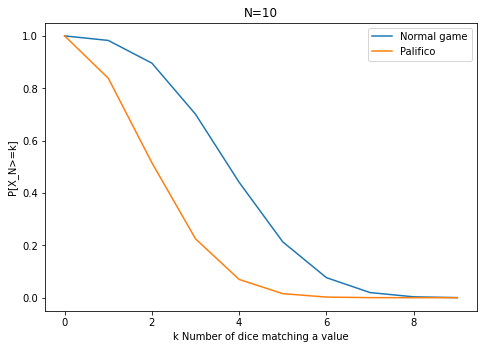

In [162]:
from scipy.stats import binom

import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])

# Probability P[X>=k] that of n dice at least k dice have:
# In case of a palifico: 
#     the same numeric value (e.g. 2) => p = 1/6
# In case of no palifico:
#     same numeric value (e.g. 2) or a 'tucan' (value 1) => p = 2/6
def palifico_prob(n,k,is_palifico=False):
    if k < 1:
        return -1
    return 1-binom.cdf(k-1, n, (1 + (not is_palifico))/6)
    
n = 10
p = 1/6
k = np.arange(0, n)
y = 1-binom.cdf(k-1, n, 2*p)
y_palifico = 1-binom.cdf(k-1, n, p)
ax.plot(k, y, label='Normal game')
ax.plot(k, y_palifico, label='Palifico')
plt.title('N={}'.format(n))
plt.xlabel('k Number of dice matching a value')
plt.ylabel('P[X_N>=k]')
plt.legend()
plt.show()

In [141]:
palifico_prob(10, 2, False)

0.8959508205050042